In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsapi

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime

yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).strftime("%m_%d_%Y")
today = datetime.datetime.today().strftime("%m_%d_%Y")

In [4]:
import glob
import os

In [5]:
data_files = glob.glob("data/player_stats/*.csv")
data_files.sort(key=os.path.getmtime)
last_7_generated = data_files[-9:-2]

In [6]:
hits = pd.concat([pd.read_csv(f) for f in last_7_generated], sort=False)

In [7]:
hits.dropna(inplace=True)

In [8]:
hits.set_index(np.arange(len(hits)), inplace=True)

In [9]:
hits['player_got_hit'] = hits['player_got_hit'].apply(float)

In [10]:
hits

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand,player_got_hit
0,Carlos Santana,467793,114,111.0,119.0,76.0,22.0,1.0,24.0,71.0,...,1.44,0.25,3.0,0.333,1.0,0.333,0.666,0.333,1.0,1.0
1,Francisco Lindor,596019,114,95.0,104.0,64.0,25.0,2.0,20.0,68.0,...,1.44,0.25,3.0,0.000,0.0,0.000,0.000,0.000,1.0,0.0
2,Franmil Reyes,614177,114,106.0,83.0,44.0,10.0,0.0,27.0,103.0,...,1.44,0.25,5.0,0.200,1.0,0.200,0.400,0.200,0.0,0.0
3,Greg Allen,656185,114,47.0,32.0,16.0,5.0,3.0,2.0,28.0,...,1.44,0.25,2.0,0.000,0.0,0.000,0.000,0.000,1.0,0.0
4,Jason Kipnis,543401,114,91.0,97.0,40.0,18.0,1.0,11.0,62.0,...,1.44,0.25,0.0,0.000,0.0,0.000,0.000,0.000,1.0,0.0
5,Jose Ramirez,608070,114,111.0,91.0,58.0,28.0,2.0,16.0,63.0,...,1.44,0.25,2.0,0.500,1.0,0.667,2.667,2.000,1.0,1.0
6,Kevin Plawecki,608700,114,43.0,29.0,11.0,8.0,0.0,2.0,24.0,...,1.44,0.25,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
7,Mike Freeman,502273,114,45.0,29.0,15.0,4.0,0.0,3.0,31.0,...,1.44,0.25,3.0,0.333,1.0,0.333,0.666,0.333,1.0,1.0
8,Oscar Mercado,640458,114,69.0,73.0,46.0,16.0,2.0,9.0,52.0,...,1.44,0.25,3.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
9,Roberto Perez,547379,114,83.0,77.0,34.0,7.0,1.0,19.0,88.0,...,1.44,0.25,1.0,0.000,0.0,0.500,0.500,0.000,0.0,0.0


In [11]:
data = hits.iloc[:, 3:-1]
data

,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,111.0,119.0,76.0,22.0,1.0,24.0,71.0,80.0,9.0,112.0,...,3.67,1.44,0.25,3.0,0.333,1.0,0.333,0.666,0.333,1.0
1,95.0,104.0,64.0,25.0,2.0,20.0,68.0,30.0,6.0,119.0,...,3.67,1.44,0.25,3.0,0.000,0.0,0.000,0.000,0.000,1.0
2,106.0,83.0,44.0,10.0,0.0,27.0,103.0,29.0,1.0,84.0,...,3.67,1.44,0.25,5.0,0.200,1.0,0.200,0.400,0.200,0.0
3,47.0,32.0,16.0,5.0,3.0,2.0,28.0,6.0,0.0,28.0,...,3.67,1.44,0.25,2.0,0.000,0.0,0.000,0.000,0.000,1.0
4,91.0,97.0,40.0,18.0,1.0,11.0,62.0,32.0,2.0,89.0,...,3.67,1.44,0.25,0.0,0.000,0.0,0.000,0.000,0.000,1.0
5,111.0,91.0,58.0,28.0,2.0,16.0,63.0,45.0,3.0,103.0,...,3.67,1.44,0.25,2.0,0.500,1.0,0.667,2.667,2.000,1.0
6,43.0,29.0,11.0,8.0,0.0,2.0,24.0,10.0,0.0,24.0,...,3.67,1.44,0.25,0.0,0.000,0.0,0.000,0.000,0.000,0.0
7,45.0,29.0,15.0,4.0,0.0,3.0,31.0,13.0,0.0,26.0,...,3.67,1.44,0.25,3.0,0.333,1.0,0.333,0.666,0.333,1.0
8,69.0,73.0,46.0,16.0,2.0,9.0,52.0,16.0,0.0,76.0,...,3.67,1.44,0.25,3.0,0.000,0.0,0.000,0.000,0.000,0.0
9,83.0,77.0,34.0,7.0,1.0,19.0,88.0,34.0,1.0,63.0,...,3.67,1.44,0.25,1.0,0.000,0.0,0.500,0.500,0.000,0.0


In [12]:
labels = hits.iloc[:, -1]
labels

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       1.0
6       0.0
7       1.0
8       0.0
9       0.0
10      0.0
11      0.0
12      1.0
13      1.0
14      1.0
15      0.0
16      0.0
17      0.0
18      1.0
19      1.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      1.0
28      1.0
29      1.0
       ... 
1849    1.0
1850    1.0
1851    0.0
1852    0.0
1853    0.0
1854    1.0
1855    0.0
1856    0.0
1857    1.0
1858    1.0
1859    1.0
1860    0.0
1861    0.0
1862    0.0
1863    0.0
1864    1.0
1865    1.0
1866    0.0
1867    0.0
1868    1.0
1869    1.0
1870    0.0
1871    1.0
1872    1.0
1873    0.0
1874    0.0
1875    1.0
1876    1.0
1877    0.0
1878    1.0
Name: player_got_hit, Length: 1879, dtype: float64

In [13]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.2)

In [14]:
np.mean(labels_train == 0)

0.5063206919494344

In [15]:
np.mean(labels_train == 1)

0.49367930805056554

In [16]:
hits.columns

Index(['Name', 'ID', 'Team', 'gamesPlayed', 'groundOuts', 'runs', 'doubles',
       'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks',
       'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops',
       'caughtStealing', 'stolenBases', 'stolenBasePercentage',
       'groundIntoDoublePlay', 'numberOfPitches', 'plateAppearances',
       'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'babip',
       'groundOutsToAirouts', 'atBatsPerHomeRun', 'atBatsPerHomeRun_p7G',
       'avg_p7G', 'hits_p7G', 'obp_p7G', 'ops_p7G', 'slg_p7G',
       'atBatsPerHomeRun_p15G', 'avg_p15G', 'hits_p15G', 'obp_p15G',
       'ops_p15G', 'slg_p15G', 'avg_p5G', 'era_p5G', 'groundOutsToAirouts_p5G',
       'hitsPer9Inn_p5G', 'homeRunsPer9_p5G', 'inningsPitched_p5G',
       'pitchesPerInning_p5G', 'runsScoredPer9_p5G',
       'stolenBasePercentage_p5G', 'strikePercentage_p5G',
       'strikeoutWalkRatio_p5G', 'strikeoutsPer9Inn_p5G', 'walksPer9Inn_p5G',
       'whip_p5G', 'winP

In [17]:
sns.set(font_scale=1.5)

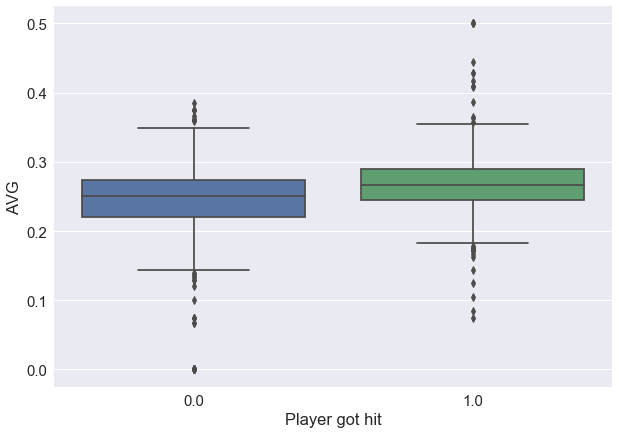

In [18]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG")
plt.show()

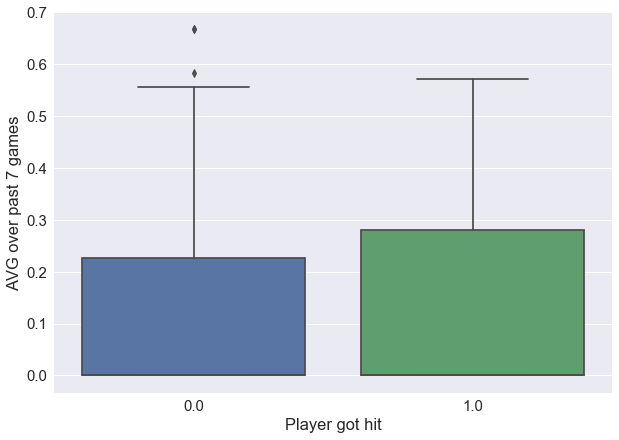

In [19]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 7 games")
plt.show()

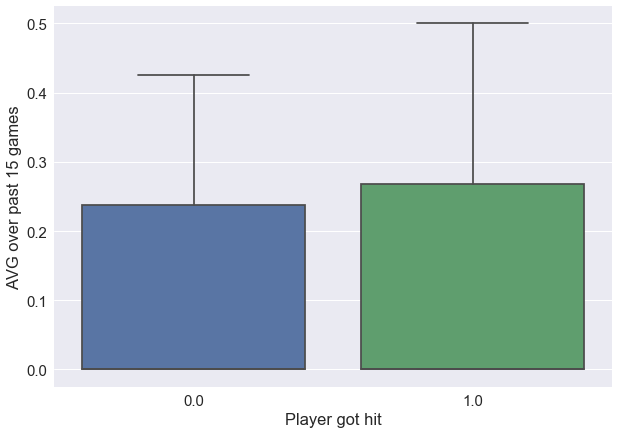

In [20]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 15 games")
plt.show()

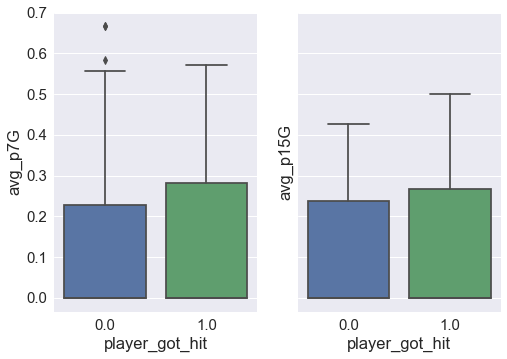

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits, ax=ax1)
sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits, ax=ax2)

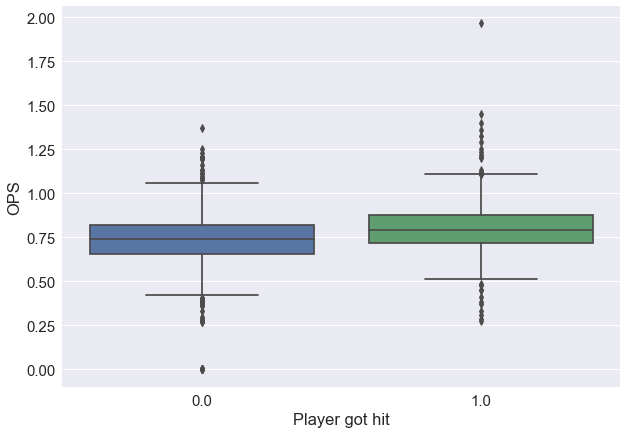

In [22]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "ops", data=hits)
ax.set(xlabel="Player got hit", ylabel="OPS")
plt.show()

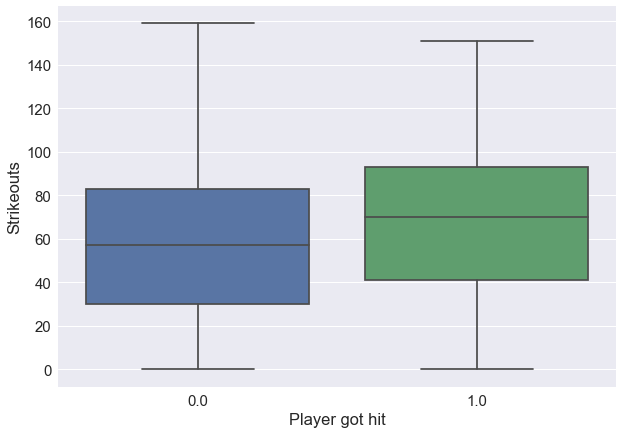

In [23]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeOuts", data=hits)
ax.set(xlabel="Player got hit", ylabel="Strikeouts")
plt.show()

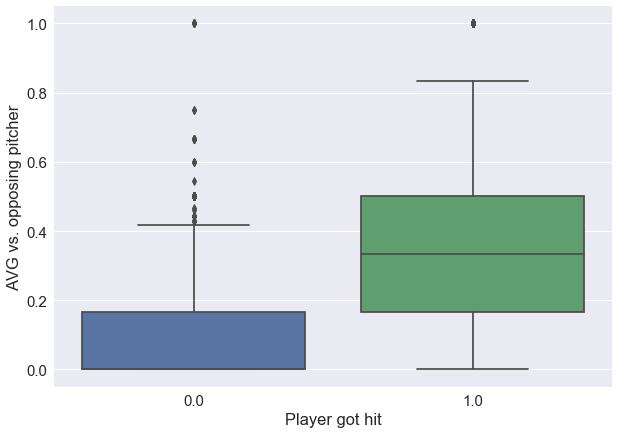

In [24]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_h2h", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG vs. opposing pitcher")
plt.show()

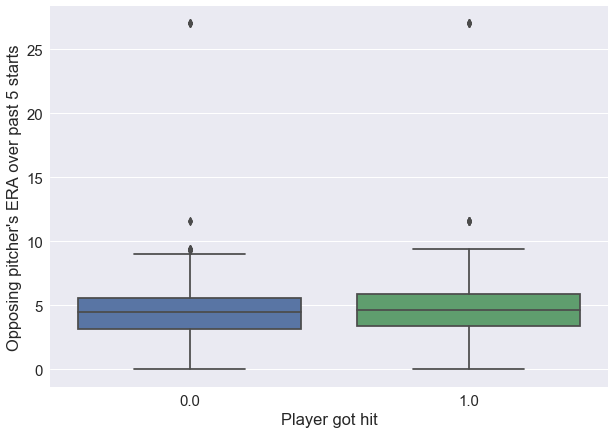

In [25]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "era_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="Opposing pitcher's ERA over past 5 starts")
plt.show()

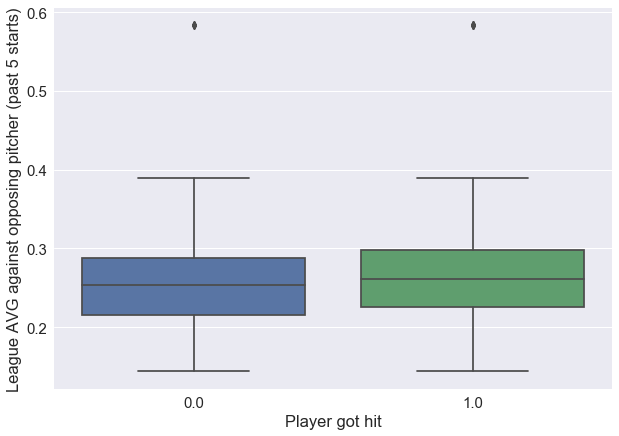

In [26]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="League AVG against opposing pitcher (past 5 starts)")
plt.show()

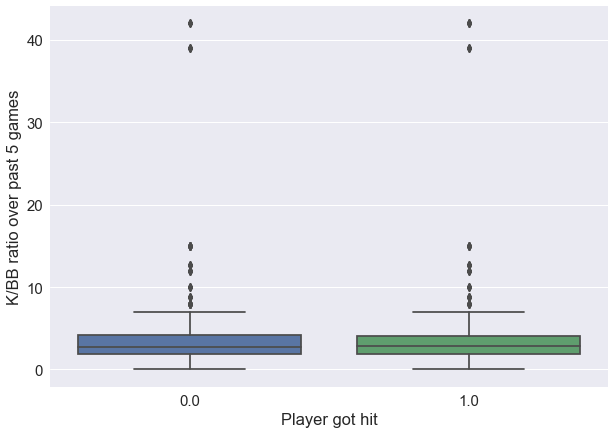

In [27]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeoutWalkRatio_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="K/BB ratio over past 5 games")
plt.show()

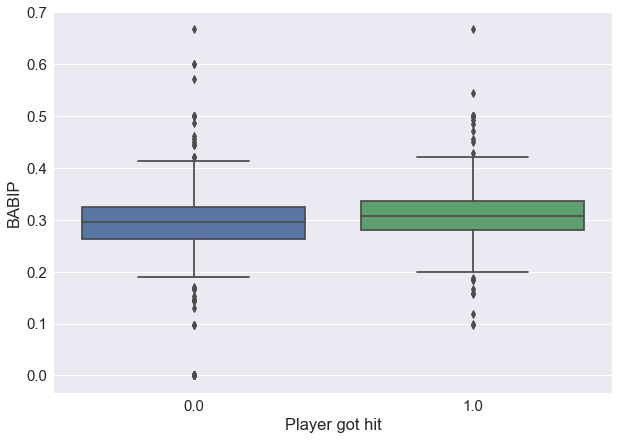

In [28]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "babip", data=hits)
ax.set(xlabel="Player got hit", ylabel="BABIP")
plt.show()

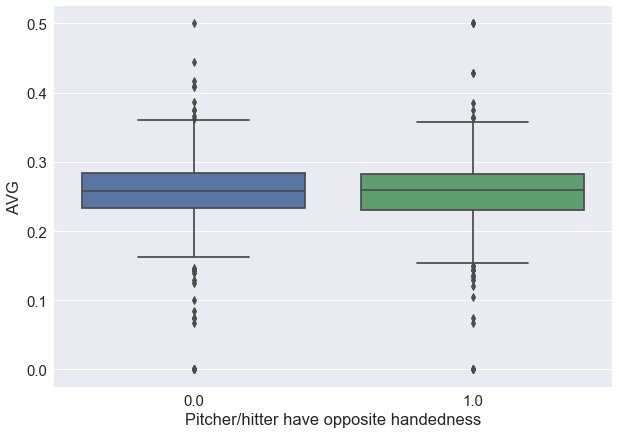

In [29]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "pitcher_hitter_opposite_hand", y = "avg", data=hits)
ax.set(xlabel="Pitcher/hitter have opposite handedness", ylabel="AVG")
plt.show()

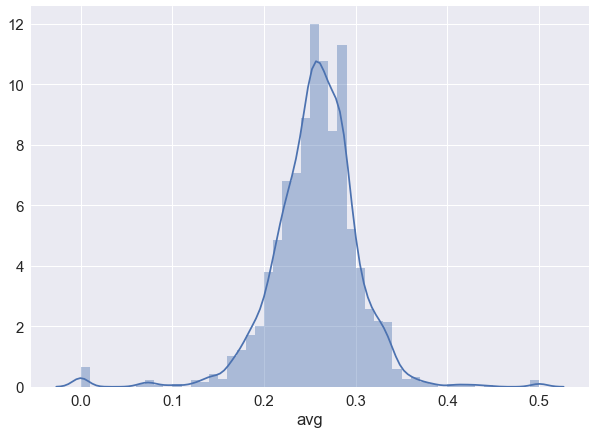

In [30]:
plt.figure(figsize=(10, 7))
sns.distplot(hits['avg'])

## Logistic Regression

In [140]:
logreg = LogisticRegression(penalty='l2').fit(data_train, labels_train)

In [141]:
np.mean(logreg.predict(data_train) == labels_train)

0.7618110236220472

In [142]:
np.mean(logreg.predict(data_val) == labels_val)

0.7375328083989501

In [143]:
hits.take(data_val.take(np.argsort(logreg.predict_proba(data_val)[:, 1])[::-1][:20]).index)['Name']

820     Aristides Aquino
337          Trea Turner
119     Aristides Aquino
287         Ozzie Albies
1635        Kevin Newman
638            Tim Lopes
533         Alex Bregman
929     Charlie Blackmon
1823           Jake Cave
1038       J.D. Martinez
253     Charlie Blackmon
1683        Mallex Smith
32        Miguel Cabrera
480       Randal Grichuk
1524     Cesar Hernandez
1506       Victor Robles
1274        Trevor Story
1221     Kevin Kiermaier
558        Anthony Rizzo
30            John Hicks
Name: Name, dtype: object

In [38]:
hits_test = pd.read_csv("data/player_stats/player_stats_{}.csv".format(today))
hits_test.head()

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,Adam Frazier,624428,134,114.0,125.0,57.0,25.0,4.0,6.0,55.0,...,4.18,1.39,0.6,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Bryan Reynolds,668804,134,100.0,86.0,65.0,25.0,2.0,13.0,88.0,...,4.18,1.39,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Cole Tucker,657061,134,41.0,33.0,11.0,8.0,0.0,2.0,34.0,...,4.18,1.39,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Colin Moran,592567,134,117.0,85.0,37.0,21.0,1.0,11.0,90.0,...,4.18,1.39,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Elias Diaz,553869,134,79.0,70.0,26.0,13.0,0.0,1.0,46.0,...,4.18,1.39,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data_test = hits_test.iloc[:, 3:]

In [40]:
hits_test.take(np.argsort(logreg.predict_proba(data_test)[:, 1])[::-1][:15])['Name']

NameError: name 'logreg' is not defined

In [147]:
precision_score(labels_val, logreg.predict(data_val))

0.7602339181286549

In [148]:
recall_score(labels_val, logreg.predict(data_val))

0.6878306878306878

In [149]:
f1_score(labels_val, logreg.predict(data_val))

0.7222222222222221

## Gradient Boosted Decision Trees -- AdaBoost

In [150]:
from sklearn.ensemble import AdaBoostClassifier

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 75, 100, 125, 150]}
]

In [152]:
ada_cv = GridSearchCV(AdaBoostClassifier(), param_grid, cv=4)
ada_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [153]:
ada_cv.best_params_

{'n_estimators': 50}

In [154]:
boosted_dt = AdaBoostClassifier(n_estimators=50)
boosted_dt.fit(data_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [155]:
np.mean(boosted_dt.predict(data_val) == labels_val)

0.7165354330708661

In [156]:
hits_test.take(np.argsort(boosted_dt.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

32         Mookie Betts
4       Cesar Hernandez
7           Jean Segura
166           Max Muncy
45         Renato Nunez
276        Alex Bregman
240    Charlie Blackmon
346      Starling Marte
137       Harold Castro
131          Tommy Pham
Name: Name, dtype: object

In [157]:
precision_score(labels_val, boosted_dt.predict(data_val))

0.7165775401069518

In [158]:
recall_score(labels_val, boosted_dt.predict(data_val))

0.708994708994709

In [159]:
f1_score(labels_val, boosted_dt.predict(data_val))

0.7127659574468084

## Random forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Tuning hyperparameters for random forests
# Note that cross-validation is sort of "automatically" done because 
# sklearn's implementation of random forests uses bagging for each 
# estimator -- more details here 
# https://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30],
    'n_estimators': [50, 75, 100, 125, 150]}
]

In [33]:
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
rf_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30], 'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
best_rf_params = rf_cv.best_params_
best_rf_params

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 30,
 'n_estimators': 125}

The best parameters seem to be a Gini score criterion, a max depth per tree of 20, a minimum of 10 points per leaf node, and 100 estimators.

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'], criterion=best_rf_params['criterion'], 
                                       max_depth=best_rf_params['max_depth'], min_samples_leaf=best_rf_params['n_estimators'])
rf_classifier.fit(data_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=125,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
np.mean(rf_classifier.predict(data_val) == labels_val)

0.7313829787234043

In [42]:
predictions = hits_test.take(np.argsort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10])[['Name', 'Team']].reset_index().iloc[:, 1:]
predictions.columns = ["name", "team_id"]
predictions["team_name"] = predictions['team_id'].apply(lambda x: statsapi.lookup_team(x)[0]['name'])
predictions["hit_probability"] = np.sort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10]
predictions.to_csv("data/predictions/predictions_{}.csv".format(today))

In [43]:
predictions

,name,team_id,team_name,hit_probability
0,Christian Yelich,158,Milwaukee Brewers,0.810595
1,Anthony Rendon,120,Washington Nationals,0.802407
2,Jonathan Villar,110,Baltimore Orioles,0.801413
3,Josh Bell,134,Pittsburgh Pirates,0.796225
4,Alex Bregman,117,Houston Astros,0.790661
5,Charlie Blackmon,115,Colorado Rockies,0.785278
6,Ketel Marte,109,Arizona Diamondbacks,0.780386
7,Tommy Pham,139,Tampa Bay Rays,0.780080
8,Mike Moustakas,158,Milwaukee Brewers,0.777193
9,Elvis Andrus,140,Texas Rangers,0.777162


In [46]:
predictions.drop(['team_id'], axis=1, inplace=True)

In [48]:
predictions.columns = ['Name', 'Team', 'Hit Probability']

In [49]:
predictions

,Name,Team,Hit Probability
0,Christian Yelich,Milwaukee Brewers,0.810595
1,Anthony Rendon,Washington Nationals,0.802407
2,Jonathan Villar,Baltimore Orioles,0.801413
3,Josh Bell,Pittsburgh Pirates,0.796225
4,Alex Bregman,Houston Astros,0.790661
5,Charlie Blackmon,Colorado Rockies,0.785278
6,Ketel Marte,Arizona Diamondbacks,0.780386
7,Tommy Pham,Tampa Bay Rays,0.780080
8,Mike Moustakas,Milwaukee Brewers,0.777193
9,Elvis Andrus,Texas Rangers,0.777162


In [168]:
precision_score(labels_val, rf_classifier.predict(data_val))

0.7679558011049724

In [169]:
recall_score(labels_val, rf_classifier.predict(data_val))

0.7354497354497355

In [170]:
f1_score(labels_val, rf_classifier.predict(data_val))

0.7513513513513513

In [171]:
most_important_features = np.take(hits_test.columns, np.argsort(rf_classifier.feature_importances_))[:25]
list(most_important_features)

['obp_h2h',
 'caughtStealing',
 'pitchesPerInning_p5G',
 'baseOnBalls',
 'totalBases',
 'homeRuns',
 'babip',
 'rbi',
 'runsScoredPer9_p5G',
 'obp_p7G',
 'sacBunts',
 'slg_p15G',
 'doubles',
 'ops_p15G',
 'obp',
 'ops',
 'groundOuts',
 'slg',
 'inningsPitched_p5G',
 'groundOutsToAirouts_p5G',
 'hitsPer9Inn_p5G',
 'avg_p5G',
 'sacFlies',
 'strikeoutsPer9Inn_p5G',
 'strikePercentage_p5G']

## Validation Accuracy, Precision, Recall, F1 Score for Each Model

In [172]:
acc_logreg = np.mean(logreg.predict(data_val) == labels_val)
prec_logreg = precision_score(labels_val, logreg.predict(data_val))
rec_logreg = recall_score(labels_val, logreg.predict(data_val))
f1_logreg = f1_score(labels_val, logreg.predict(data_val))

In [173]:
acc_rf = np.mean(rf_classifier.predict(data_val) == labels_val)
prec_rf = precision_score(labels_val, rf_classifier.predict(data_val))
rec_rf = recall_score(labels_val, rf_classifier.predict(data_val))
f1_rf = f1_score(labels_val, rf_classifier.predict(data_val))

In [174]:
acc_ada = np.mean(boosted_dt.predict(data_val) == labels_val)
prec_ada = precision_score(labels_val, boosted_dt.predict(data_val))
rec_ada = recall_score(labels_val, boosted_dt.predict(data_val))
f1_ada = f1_score(labels_val, boosted_dt.predict(data_val))

In [175]:
performance = pd.DataFrame([['Logreg', acc_logreg, prec_logreg, rec_logreg, f1_logreg],
             ['Random Forests', acc_rf, prec_rf, rec_rf, f1_rf],
             ['AdaBoost', acc_ada, prec_ada, rec_ada, f1_ada]], 
             columns=['Model', 'Accuracy', 'Precision', 'Recall', "F1 Score"])
performance

,Model,Accuracy,Precision,Recall,F1 Score
0,Logreg,0.737533,0.760234,0.687831,0.722222
1,Random Forests,0.758530,0.767956,0.735450,0.751351
2,AdaBoost,0.716535,0.716578,0.708995,0.712766


In [176]:
performance.sort_values('F1 Score', ascending=False).iloc[0]['Model']

'Random Forests'

In [177]:
performance.to_csv("data/model_stats/performance_{}.csv".format(today))

## K-NN, because why not

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
# TODO: tune hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [191]:
np.mean(knn_clf.predict(data_val) == labels_val)

0.603415559772296

In [192]:
hits_test.take(np.argsort(knn_clf.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

203    Ronald Acuna Jr.
136      Hanser Alberto
55         Kevin Newman
270        Raimel Tapia
263        Wilson Ramos
147       Freddy Galvis
84     Francisco Lindor
217       Danny Santana
32           Matt Adams
102      Randal Grichuk
Name: Name, dtype: object